 # <center> <b>  STROKE PREDICTION </b> </center> 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 6)
sns.set(context="paper", font="monospace")

## Data Preparation and EDA

In [3]:
data = pd.read_csv('stroke-data.csv')
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Specify hypertension and heart_disease columns categories

In [5]:
mapper = {0: 'No', 1: 'Yes'}
def encode(val):
    return mapper[val]

for col in ['hypertension','heart_disease']:    
    data[col] = data[col].apply(encode)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


Drop axis column

In [7]:
data.drop('id', axis=1, inplace=True)

In [8]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Fill null values in bmi column with mean value 

In [9]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Target Feature EDA

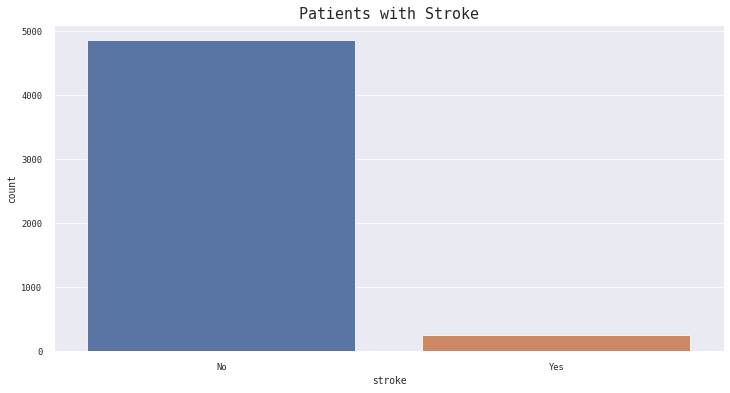

In [10]:
sns.countplot('stroke', data=data)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Patients with Stroke', size=15)
plt.savefig('stroke_count.png');

In [11]:
perc = data['stroke'].value_counts(normalize=True)*100
perc 

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [12]:
perc.keys()

Int64Index([0, 1], dtype='int64')

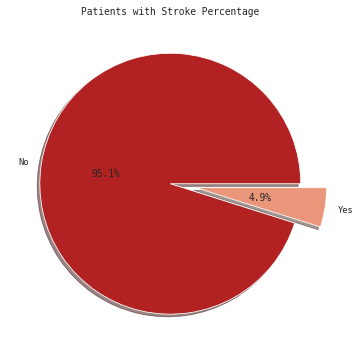

In [13]:
labels = perc.keys() # get labels from perc
# autopct allows formatting percentage string
plt.pie(x=perc, autopct="%1.1f%%", explode=[0,0.2], labels=['No', 'Yes'], 
        pctdistance=0.5, shadow=True, colors=['firebrick','DarkSalmon'])
plt.title("Patients with Stroke Percentage")
plt.savefig('stroke_pie_chart.png');

**Observation:** The pie plot and count plot shows that there is high imbalance in the target variable. About $4.9\%$ of patients had a stroke, while $95.1\%$ did not.

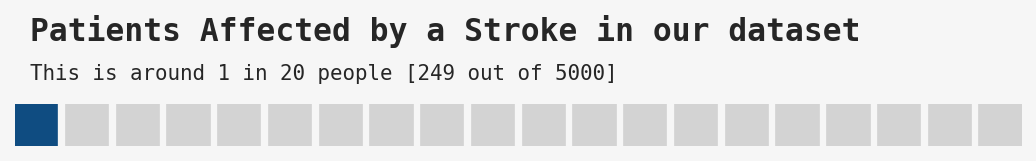

In [14]:
from pywaffle import Waffle

fig = plt.figure(figsize=(7, 2),dpi=150, facecolor="#f6f6f6",
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='',
    font_size=20,vertical=True,
)

fig.text(0.035,0.78,'Patients Affected by a Stroke in our dataset',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'This is around 1 in 20 people [249 out of 5000]',fontsize=10)

plt.show()

**Observation:** Strokes are still relatively rare

### Object and Numerical columns EDA


Get categorical and numerical features 

In [15]:
cat_feat = list(data.select_dtypes(exclude = np.number).columns)
num_feat = list(data.select_dtypes(exclude = object).columns)

In [16]:
print(cat_feat)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [17]:
num_feat

['age', 'avg_glucose_level', 'bmi', 'stroke']

Drop stroke column from numerical features

In [18]:
num_feat.pop()
num_feat

['age', 'avg_glucose_level', 'bmi']

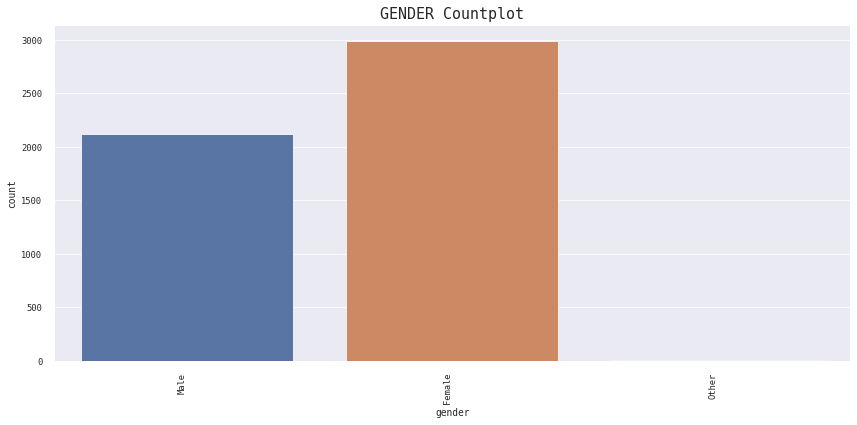

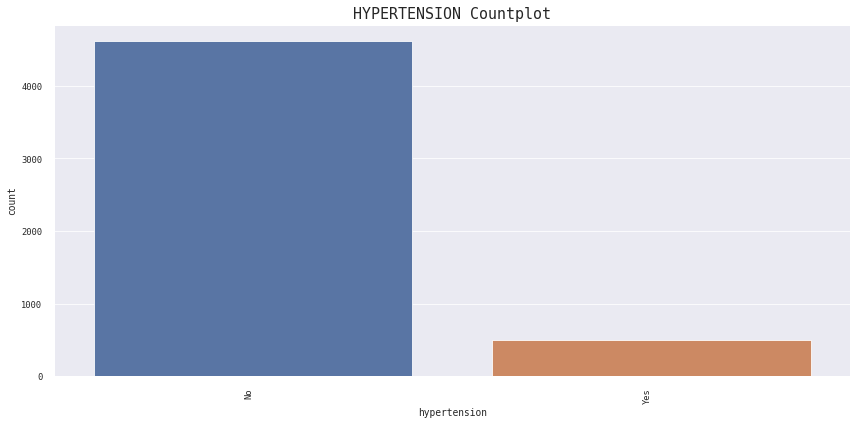

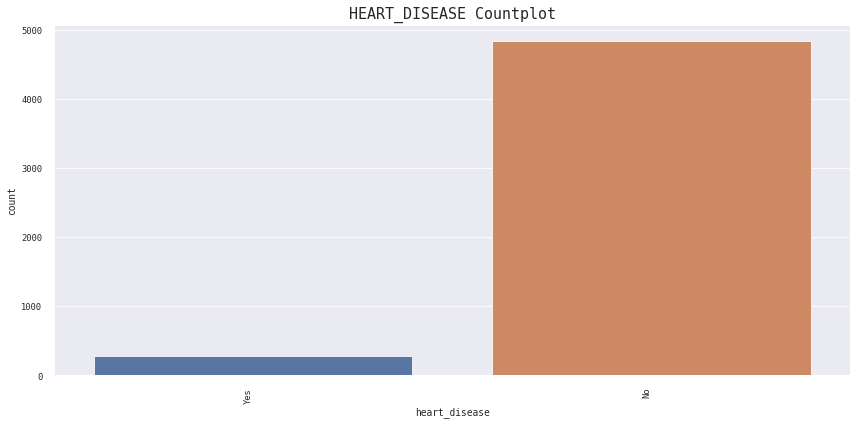

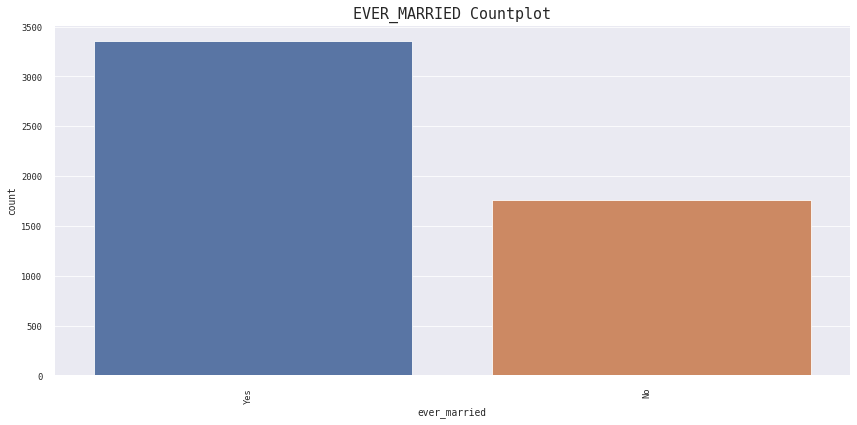

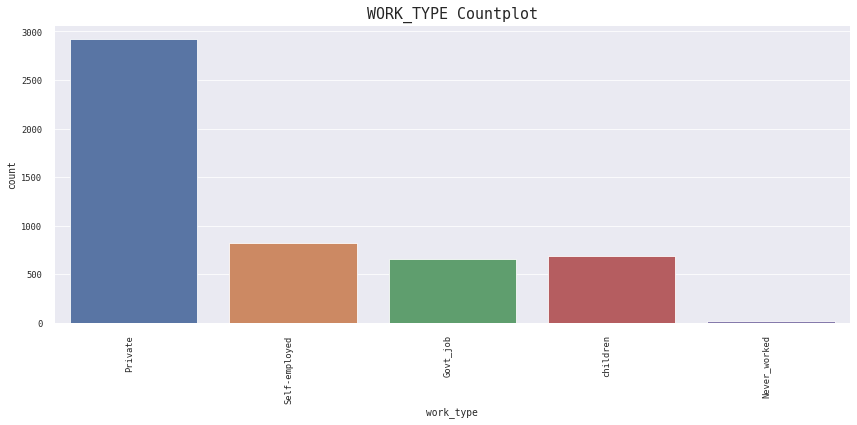

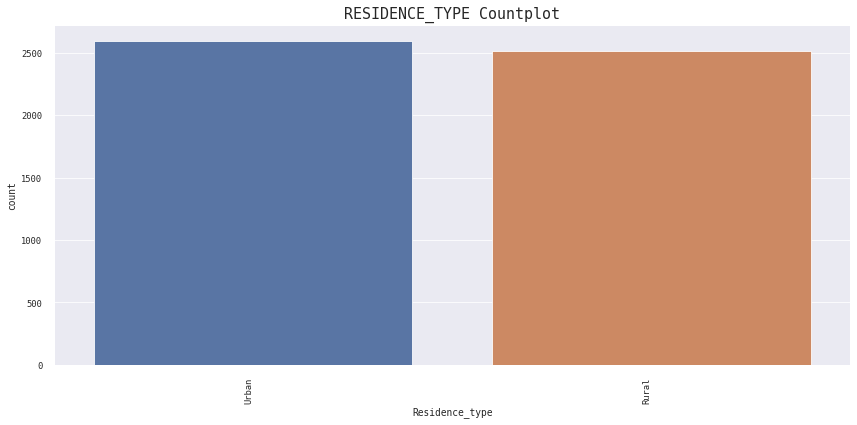

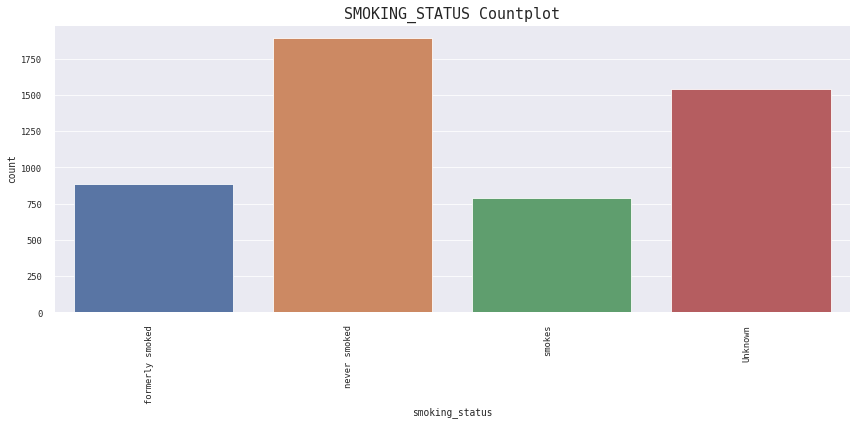

In [19]:
for col in cat_feat:
#     plt.figure(figsize=(12,5))
    g = sns.countplot(x=col, data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    plt.title(col.upper()+' Countplot', size=15)
    plt.tight_layout()
    plt.show()

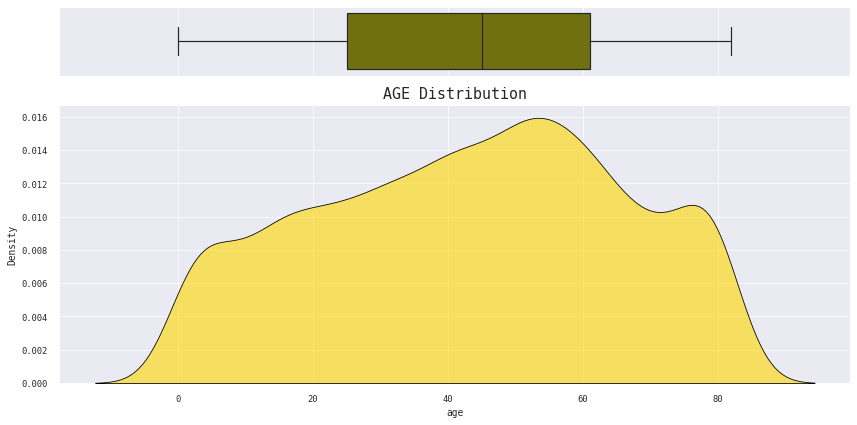

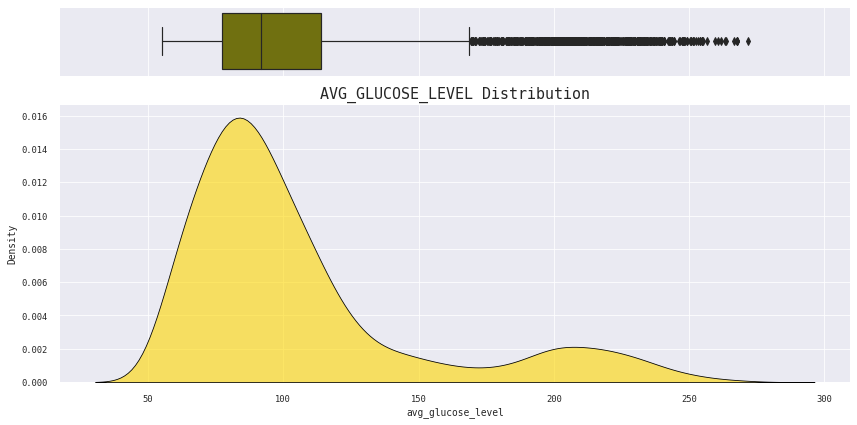

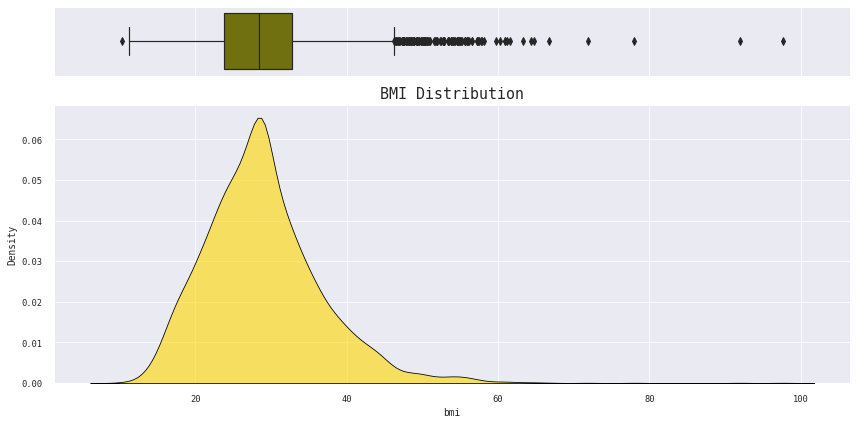

In [20]:
for col in data[num_feat]:
    ax = [None for i in range(2)]
    # set 2 subplots and set ratio of plots 
    f, (ax[0], ax[1]) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)
                                        })   
    g1 = sns.boxplot(col, ax=ax[0], data=data, color='olive') # boxplot
    g1.set(xlabel=None) # remove x axis label for boxplot
    g2 = sns.kdeplot(data[col], ax=ax[1], shade=True, color='gold', alpha=0.6, 
                     zorder=3, edgecolor='black') # distribution plot
    plt.title(col.upper()+' Distribution', size=15)
    plt.tight_layout()
    plt.show()

**Observation:** Most patients are between $40$ to $60$ years old, and have bmi mostly between $25$ and $35$. Lots of outliers in average glucose level and bmi columns.

### Analyis of Categorical Variables and Target

In [21]:
stroke = data['stroke'].apply(encode)
stroke.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: stroke, dtype: object

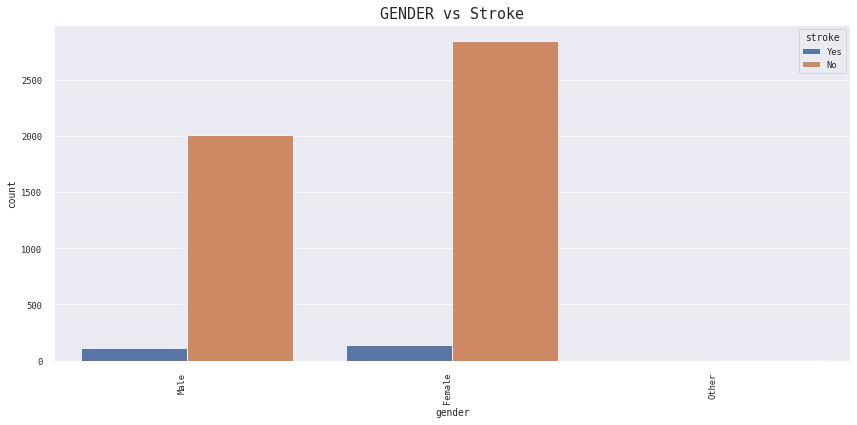

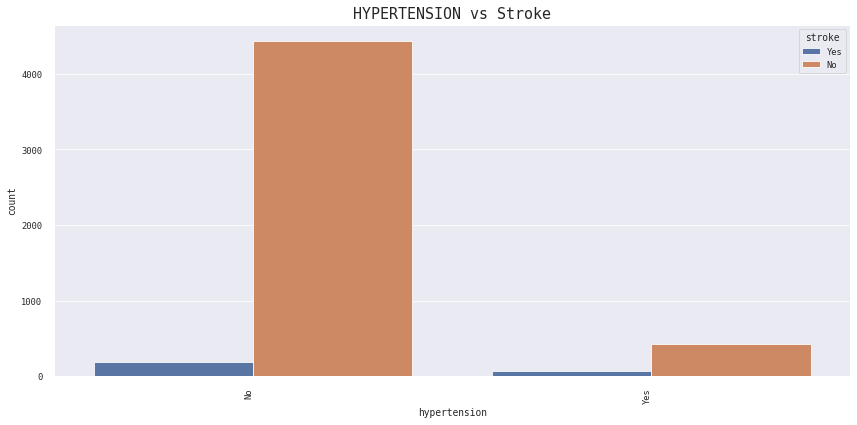

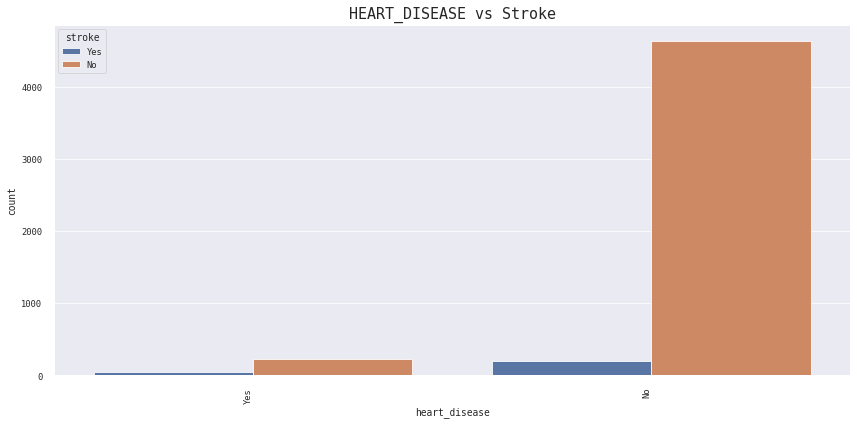

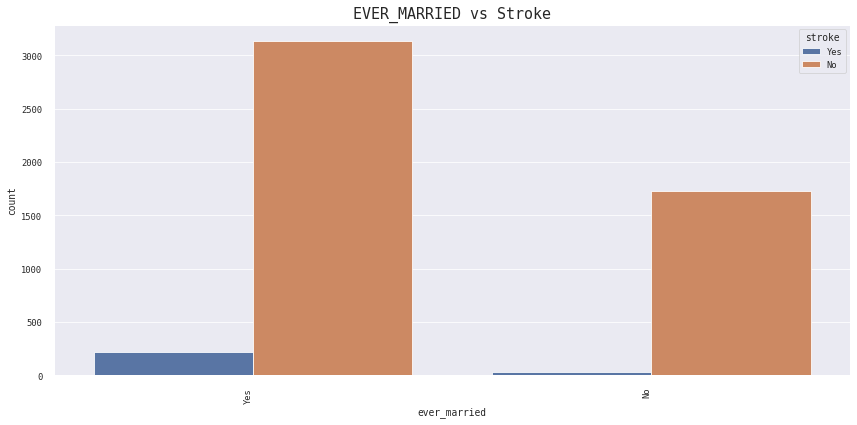

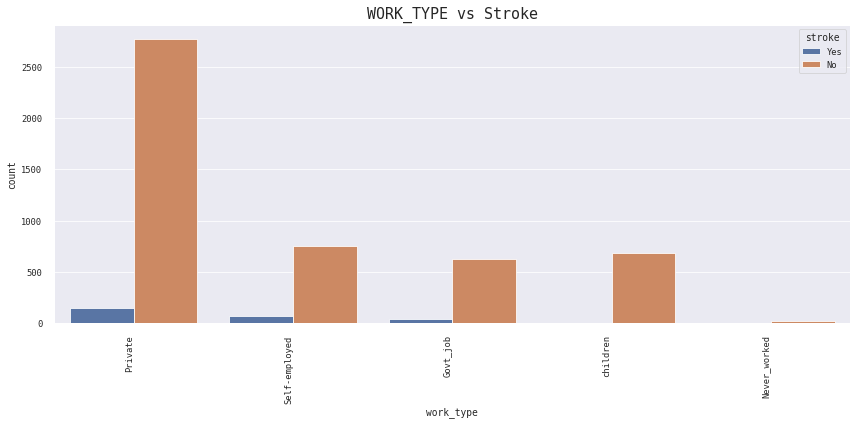

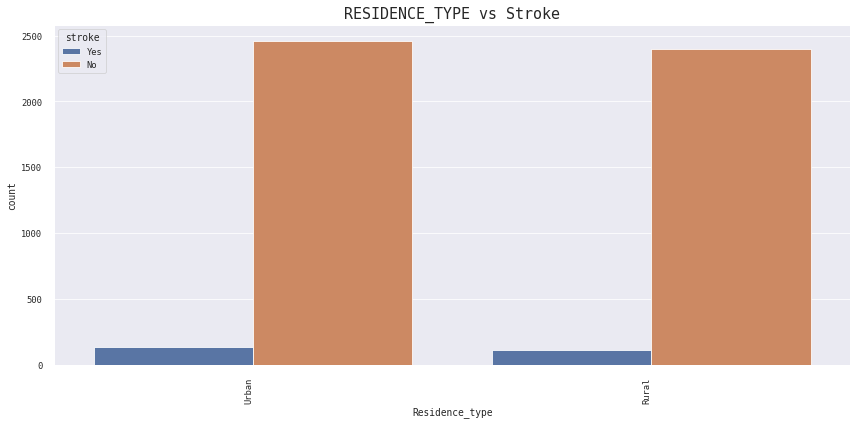

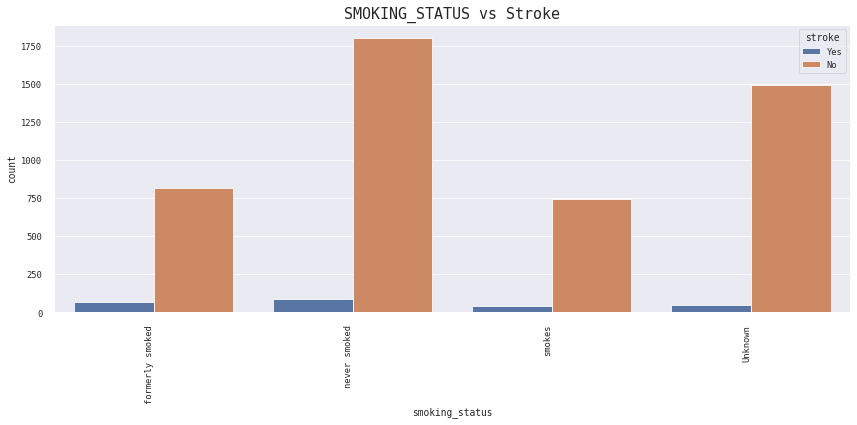

In [22]:
for col in cat_feat:
#     plt.figure(figsize=(12,5))
    g = sns.countplot(x=col, data=data, hue=stroke)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    plt.title(col.upper()+' vs Stroke', size=15)
    plt.tight_layout()
    plt.show() 

### Analyis of Continuous Variables and Target

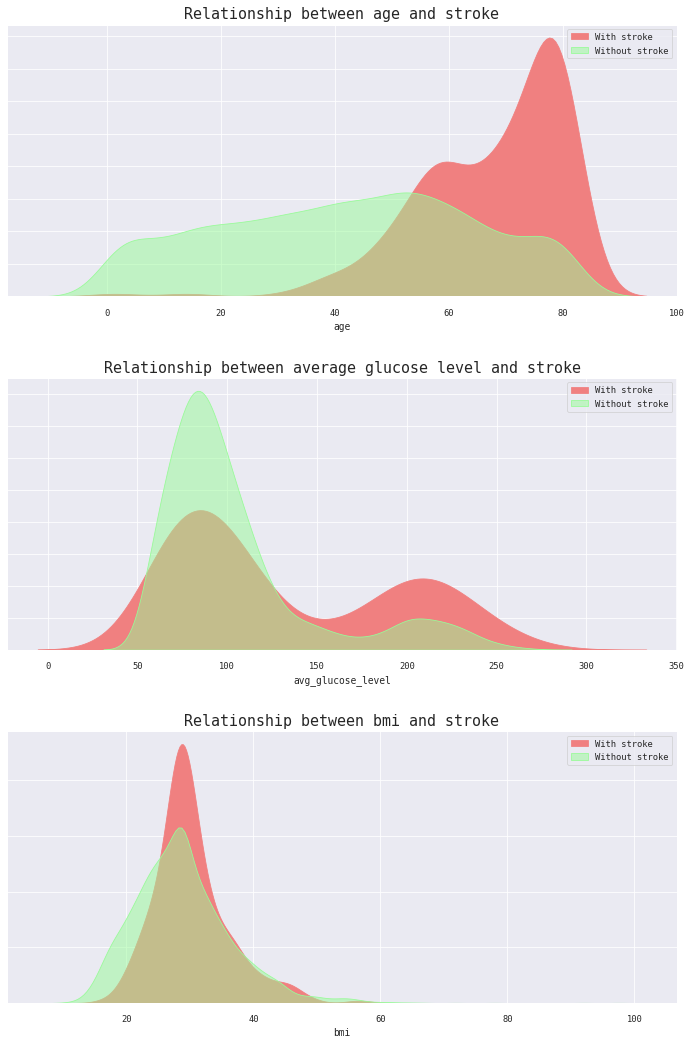

In [23]:
fig=plt.figure(figsize=(12,18),facecolor='white')

ax=[None for i in range(3)]
gs=fig.add_gridspec(3,1)
gs.update(wspace=0, hspace=0.3)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,0])

# first plot
sns.kdeplot(data=data[data.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
ax[0].set_title('Relationship between age and stroke', fontsize=15)
# second plot
sns.kdeplot(data=data[data.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)
ax[1].set_title('Relationship between average glucose level and stroke', fontsize=15)
# third plot
sns.kdeplot(data=data[data.stroke==1],x='bmi',ax=ax[2],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='bmi',ax=ax[2],shade=True,color='palegreen',alpha=0.5)
ax[2].set_title('Relationship between bmi and stroke', fontsize=15)
plt.tight_layout()
for i in range(3):
    ax[i].legend(labels=['With stroke', 'Without stroke'])
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')

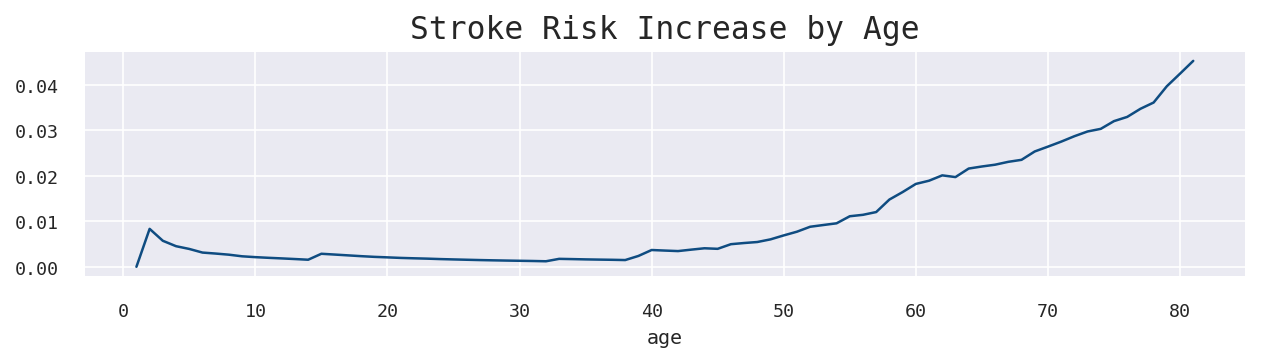

In [24]:
fig = plt.figure(figsize=(10, 5), dpi=150)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

data['age'] = data['age'].astype(int)

rate = []
for i in range(data['age'].min(), data['age'].max()):
    rate.append(data[data['age'] < i]['stroke'].sum() / len(data[data['age'] < i]['stroke']))

sns.lineplot(data=rate, color='#0f4c81', ax=ax0)
ax0.set_xlabel('age') 
ax0.set_title('Stroke Risk Increase by Age', fontsize=15)
plt.show()

**Observation:** The older a patient is, the more likely he/she has a stroke.

In [25]:
str_only = data[data['stroke'] == 1]
no_str_only = data[data['stroke'] == 0]

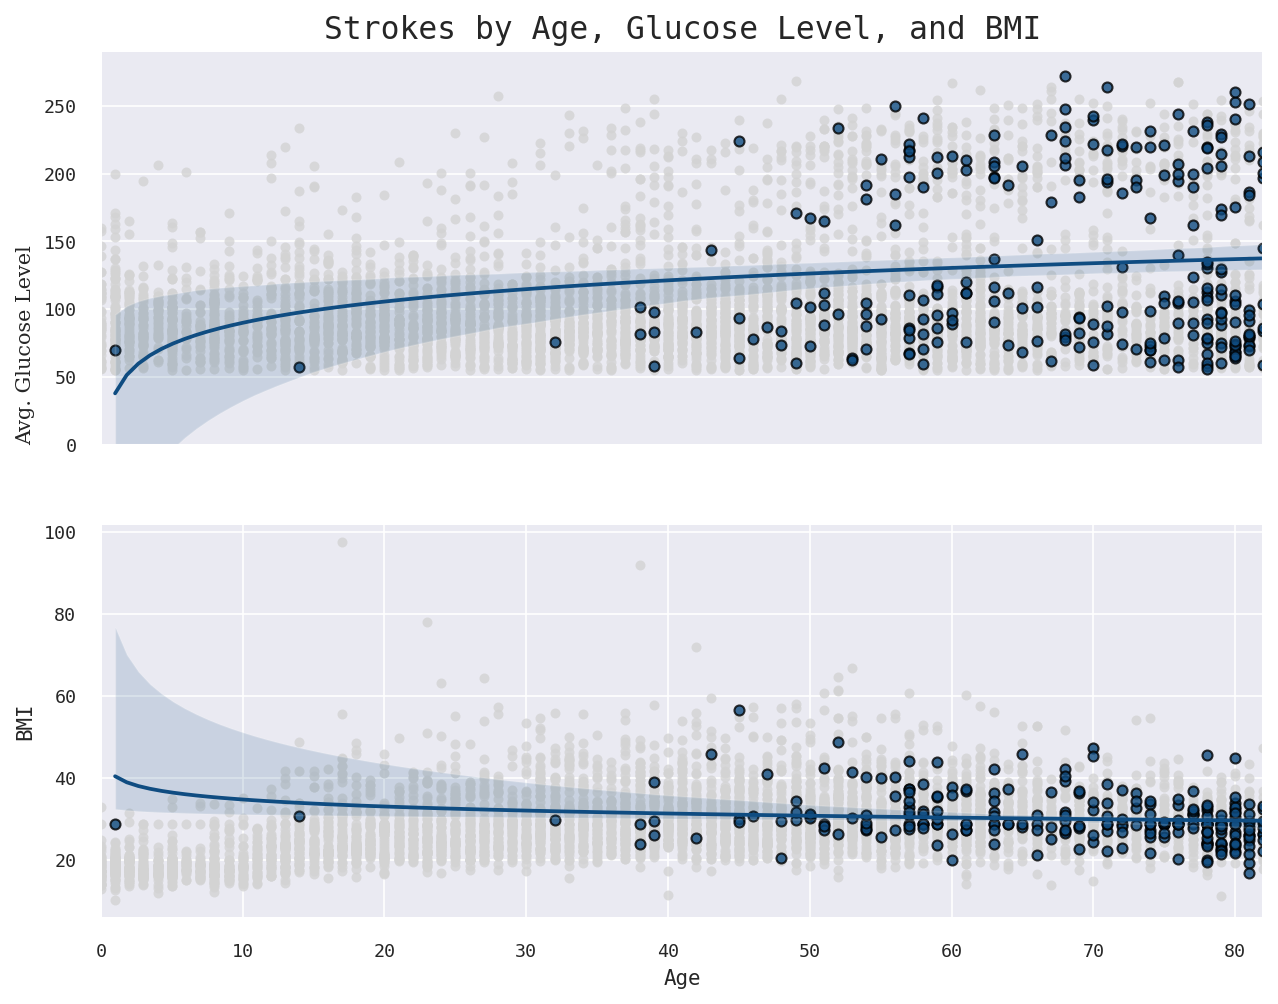

In [26]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,16),dpi=150) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 


# glucose
sns.regplot(no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)
sns.regplot(str_only['age'],y=str_only['avg_glucose_level'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

# bmi
sns.regplot(no_str_only['age'],y=no_str_only['bmi'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['age'],y=str_only['bmi'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10)
ax1.set_ylabel("BMI",fontsize=10)
ax0.set_title('Strokes by Age, Glucose Level, and BMI', fontsize=15);

### Univariate analysis of categorical variables

#### Gender

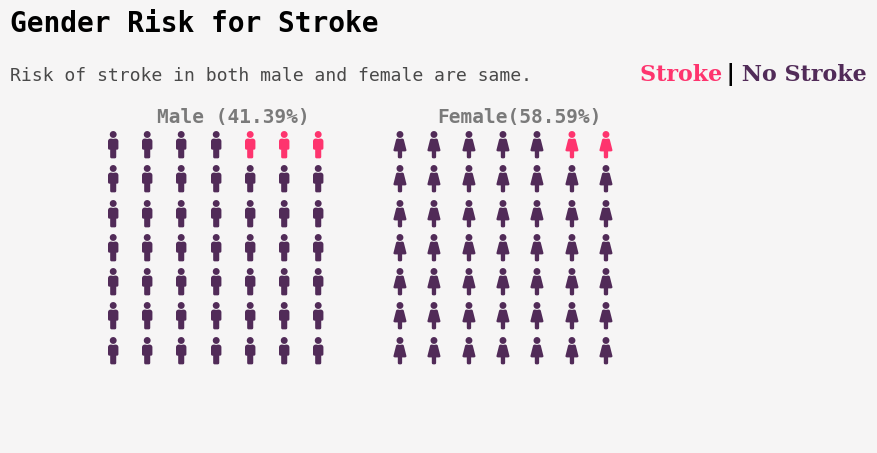

In [27]:
stroke_gen = data[data['stroke'] == 1]['gender'].value_counts()
healthy_gen = data[data['stroke'] == 0]['gender'].value_counts()

female = data['gender'].value_counts(normalize=True).values[0]
male =  data['gender'].value_counts(normalize=True).values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = round(female * 100, 2)
male_per = round(male * 100, 2)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
fig.text(0., 0.8, 'Gender Risk for Stroke', {'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same. ', {'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'size':16,'weight':'bold', 'color':'#f6f5f5'})
# fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
# fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '| ', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, ' No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)

fig.show()

#### Hypertension

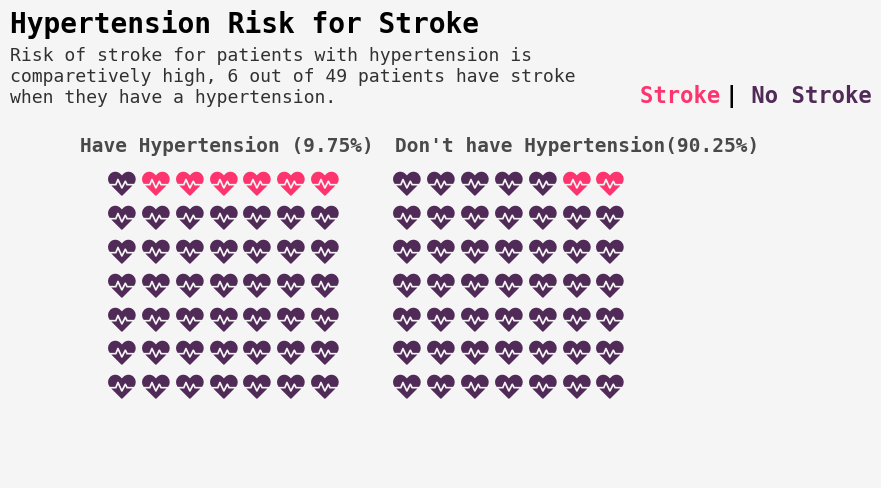

In [28]:
stroke_hyper = data[data['stroke'] == 1]['hypertension'].value_counts()
healthy_hyper = data[data['stroke'] == 0]['hypertension'].value_counts()

no = data['hypertension'].value_counts(normalize=True).values[0]
yes =  data['hypertension'].value_counts(normalize=True).values[1]

stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

no_per = round(no * 100, 2)
yes_per = round(yes * 100, 2)


fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heartbeat',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':1,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heartbeat',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':1,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)

fig.text(0., 0.85, 'Hypertension Risk for Stroke', {'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.75, 'Risk of stroke for patients with hypertension is \ncomparetively high, 6 out of 49 patients have stroke \nwhen they have a hypertension. ', 
         {'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', {'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'size':16,'weight':'bold', 'color':'#f6f5f5'})
# fig.text(0.23, 0.28, '{}%'.format(healthy_yes), {'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1)
# fig.text(0.63, 0.28, '{}%'.format(healthy_no), {'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.1, 0.68, 'Have Hypertension ({}%)'.format(yes_per), {'size':14,'weight':'bold' ,'color':'black'},alpha = 0.7,)
fig.text(0.55, 0.68, "Don't have Hypertension({}%)".format(no_per), {'size':14,'weight':'bold', 'color':'black'}, alpha = 0.7)

fig.text(0.90,0.75, 'Stroke ', {'weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.75, ' No Stroke', {'weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)

fig.show()

#### Heart Disease

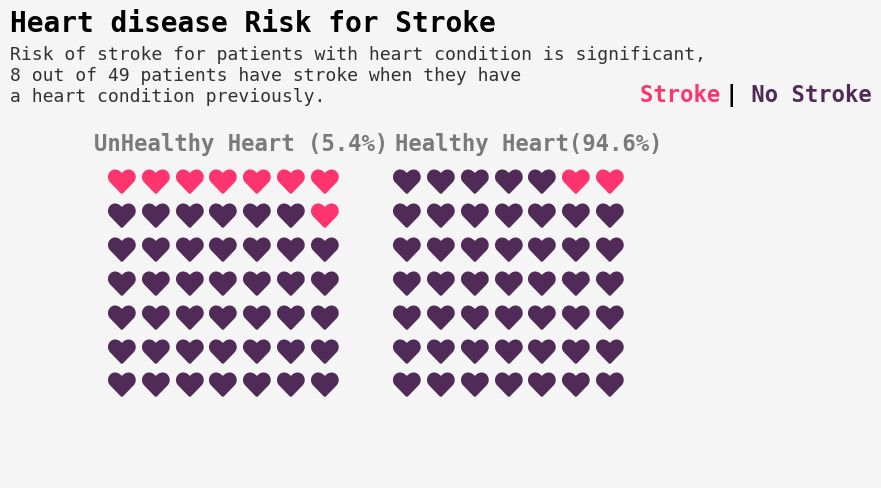

In [29]:
stroke_hyper = data[data['stroke'] == 1]['heart_disease'].value_counts()
healthy_hyper = data[data['stroke'] == 0]['heart_disease'].value_counts()

no = data['heart_disease'].value_counts(normalize=True).values[0]
yes =  data['heart_disease'].value_counts(normalize=True).values[1]

stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

no_per = round(no * 100, 2)
yes_per = round(yes* 100, 2)

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heart',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)

fig.text(0., 0.85, 'Heart disease Risk for Stroke', {'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.75, 'Risk of stroke for patients with heart condition is significant,\n8 out of 49 patients have stroke when they have \na heart condition previously. ', {'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', {'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'size':16,'weight':'bold', 'color':'#f6f5f5'})
# fig.text(0.25, 0.27, '{}%'.format(healthy_yes), {'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1)
# fig.text(0.65, 0.27, '{}%'.format(healthy_no), {'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.12, 0.68, 'UnHealthy Heart ({}%)'.format(yes_per), {'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.55, 0.68, "Healthy Heart({}%)".format(no_per), {'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.9,0.75, 'Stroke ', {'weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.75, ' No Stroke', {'weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)

fig.show() 

#### Marraige

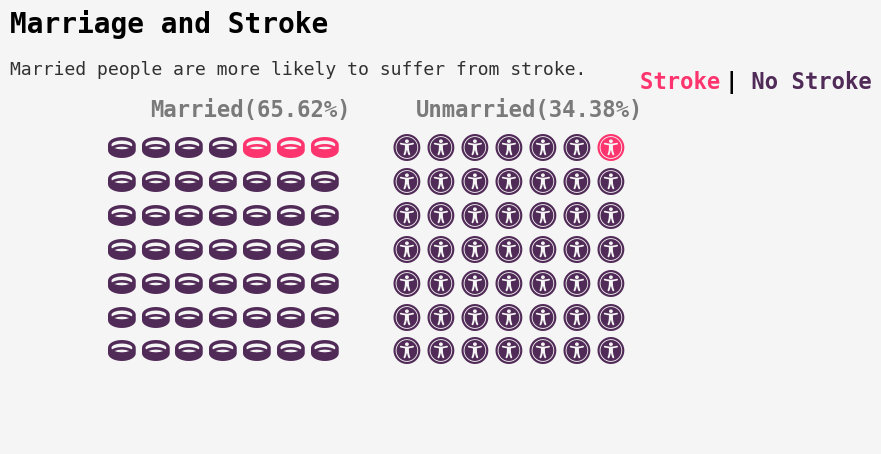

In [30]:
stroke_mary = data[data['stroke'] == 1]['ever_married'].value_counts()
healthy_mary = data[data['stroke'] == 0]['ever_married'].value_counts()

yes = data['ever_married'].value_counts(normalize=True).values[0]
no =  data['ever_married'].value_counts(normalize=True).values[1]

stroke_no = int(round (stroke_mary.values[1] / no * 100, 0))
stroke_yes = int(round( stroke_mary.values[0] / yes *100, 0))
healthy_no = int(round(healthy_mary.values[1] / no * 100, 0))
healthy_yes = int(round(healthy_mary.values[0] / yes *100, 0))

no_per = round(no * 100, 2)
yes_per = round(yes * 100, 2)

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ring',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'universal-access',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)

fig.text(0., 0.8, 'Marriage and Stroke', { 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.74, 'Married people are more likely to suffer from stroke.', { 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', { 'size':16,'weight':'bold' ,'color':'#f6f5f5'}) 
fig.text(0.65, 0.22, 'ooo', { 'size':16,'weight':'bold', 'color':'#f6f5f5'}) 
# fig.text(0.25, 0.28, '{}%'.format(healthy_yes), { 'size':20,'weight':'bold' , 'color':'#2c003e'}, alpha = 1,)
# fig.text(0.65, 0.28, '{}%'.format(healthy_no), { 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.20, 0.68, 'Married({}%)'.format(yes_per), { 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.58, 0.68, "Unmarried({}%)".format(no_per), { 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.9,0.72, 'Stroke ', {'weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.72, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.72, ' No Stroke', {'weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

#### Residence Type

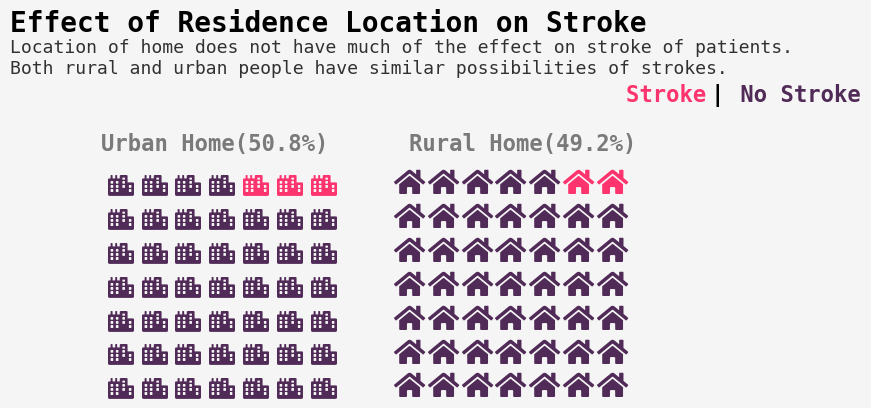

In [31]:
stroke_home = data[data['stroke'] == 1]['Residence_type'].value_counts()
healthy_home= data[data['stroke'] == 0]['Residence_type'].value_counts()

urban = data['Residence_type'].value_counts(normalize=True).values[0]
rural =  data['Residence_type'].value_counts(normalize=True).values[1]

stroke_urban = int(round (stroke_home.values[0] / urban * 100, 0))
stroke_rural= int(round( stroke_home.values[1] / rural *100, 0))
healthy_urban = int(round(healthy_home.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_home.values[1] / rural *100, 0))

urban_per = round(urban * 100, 2)
rural_per = round(rural* 100, 2)

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_urban,healthy_urban],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'city',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_rural,healthy_rural],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'home',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)

fig.text(0., 0.85, 'Effect of Residence Location on Stroke', { 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.79, 'Location of home does not have much of the effect on stroke of patients.\nBoth rural and urban people have similar possibilities of strokes.', { 'size':13, 'color':'black', 'weight':'normal'}, alpha =0.8)

# fig.text(0.23, 0.28, '{}%'.format(healthy_urban), {'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
# fig.text(0.68, 0.28, '{}%'.format(healthy_rural), {'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.13, 0.68, 'Urban Home({}%)'.format(urban_per), { 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.57, 0.68, "Rural Home({}%)".format(rural_per), { 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.88,0.75, 'Stroke ', {'weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.025,0.75, ' No Stroke', {'weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)

fig.show()

#### Smokers

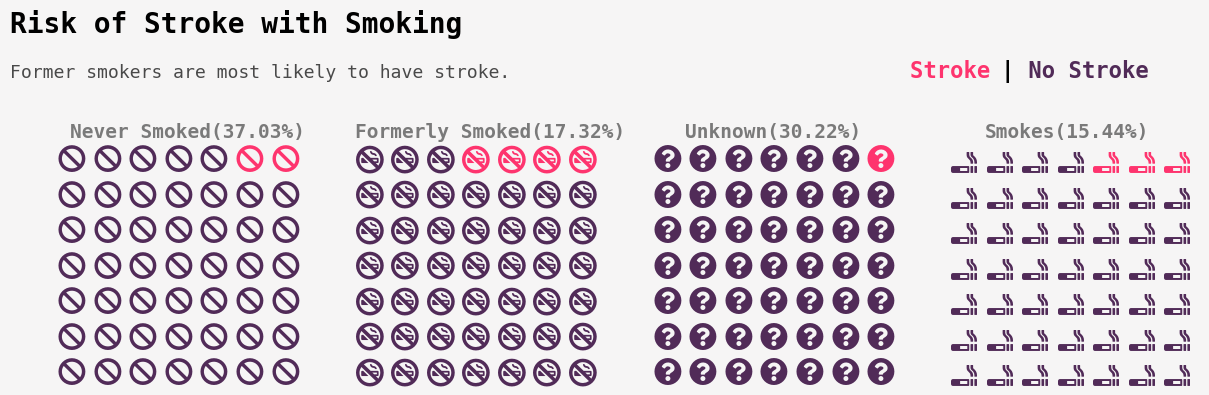

In [32]:
smoke = data['smoking_status'].value_counts(normalize=True)
stroke_smoke = data[data['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = data[data['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = int(round (stroke_smoke.values[0] / never * 100, 0))
stroke_unknown = int(round( stroke_smoke.values[2]  / unknown *100, 0))
stroke_former = int(round (stroke_smoke.values[1]  / former * 100, 0))
stroke_smokes = int(round( stroke_smoke.values[3]  / smokes *100, 0))

healthy_never = int(round(healthy_smoke.values[0] / never * 100, 0))
healthy_unknown = int(round(healthy_smoke.values[1] / unknown *100, 0))
healthy_former = int(round(healthy_smoke.values[2] / former * 100, 0))
healthy_smokes = int(round(healthy_smoke.values[3]/ smokes *100, 0))

never_per = round(never * 100, 2)
unknown_per = round(unknown * 100, 2)
former_per = round(former * 100, 2)
smokes_per = round(smokes * 100, 2)



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'141':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_never,healthy_never],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ban',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '142' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_former,healthy_former],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'smoking-ban',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '143':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_unknown,healthy_unknown],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'question-circle',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '144' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_smokes,healthy_smokes],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'smoking',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
)


fig.text(0.1, 0.65, 'Risk of Stroke with Smoking', { 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0.1, 0.62, 'Former smokers are most likely to have stroke. ', { 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)

fig.text(0.14, 0.58, 'Never Smoked({}%)'.format(never_per), { 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.33, 0.58, "Formerly Smoked({}%)".format(former_per), { 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
fig.text(0.55, 0.58, 'Unknown({}%)'.format(unknown_per), { 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.75, 0.58, "Smokes({}%)".format(smokes_per), { 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.7,0.62, 'Stroke ', {'weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(0.76,0.62, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(0.77,0.62, ' No Stroke', {'weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)

fig.show()

#### Work

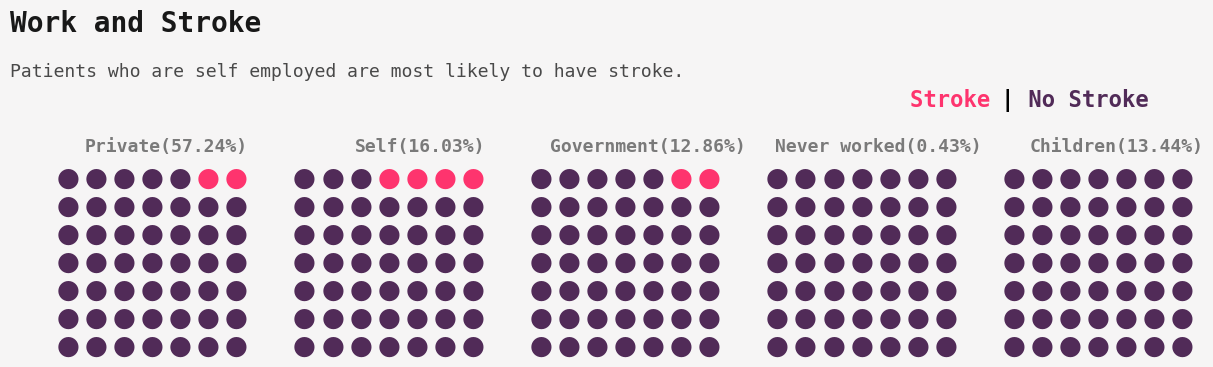

In [33]:
work = data['work_type'].value_counts(normalize=True)
stroke_work = data[data['stroke'] == 1]['work_type'].value_counts()
healthy_work = data[data['stroke'] == 0]['work_type'].value_counts()

private = work.values[0]
self_ =  work.values[1]
child = work.values[2]
gov = work.values[3]
never = work.values[4]

stroke_private = int(round (stroke_work.values[0] / private * 100, 0))
stroke_self_ = int(round( stroke_work.values[1]  / self_ *100, 0))
stroke_child = int(round (stroke_work.values[3]  / child * 100, 0))
stroke_gov = int(round( stroke_work.values[2]  / gov *100, 0))
stroke_never = int(round( 0, 0))

healthy_private = int(round(healthy_work.values[0] / private * 100, 0))
healthy_self_ = int(round(healthy_work.values[1] / self_ *100, 0))
healthy_child = int(round(healthy_work.values[2] / child * 100, 0))
healthy_gov = int(round(healthy_work.values[3]/ gov *100, 0))
healthy_never = int(round(healthy_work.values[4]/ never *100, 0))

private_per = round(private * 100, 2)
self__per = round(self_* 100, 2)
child_per = round(child * 100, 2)
gov_per = round(gov * 100, 2)
never_per = round(never* 100, 2)


fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'151':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_private,healthy_private],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '152' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_self_,healthy_self_],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '153':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_gov,healthy_gov],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '154' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_never,healthy_never],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '155' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_child,healthy_child],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
)


fig.text(0.1, 0.65, 'Work and Stroke', { 'size':20, 'color':'black', 'weight':'bold'},alpha = 0.9)
fig.text(0.1, 0.62, 'Patients who are self employed are most likely to have stroke.', { 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)

fig.text(0.15, 0.57, 'Private({}%)'.format(private_per), { 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.33, 0.57, "Self({}%)".format(self__per), { 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5)
fig.text(0.46, 0.57, 'Government({}%)'.format(gov_per), { 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.57, "Never worked({}%)".format(never_per), { 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5)
fig.text(0.78, 0.57, "Children({}%)".format(child_per), { 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5)         

fig.text(0.7,0.6, 'Stroke ', {'weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(0.76,0.6, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(0.77,0.6, ' No Stroke', {'weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)

fig.show()

### Features Correlation

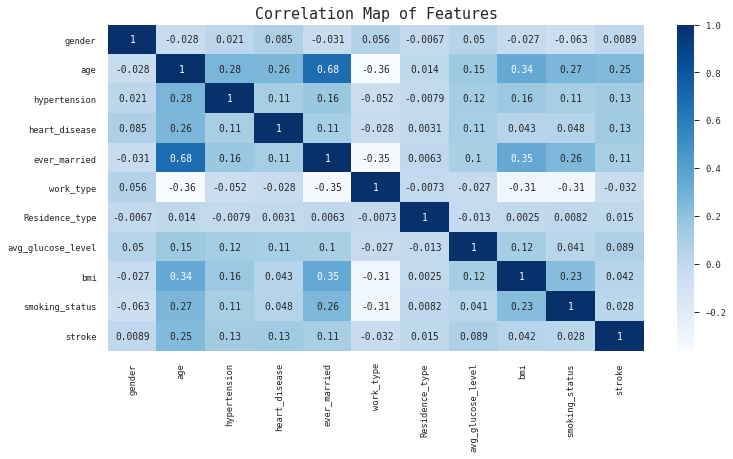

In [34]:
from sklearn.preprocessing import LabelEncoder
#  Using Lable encoding
le = LabelEncoder()
en_df = data.apply(le.fit_transform)
en_df.head()
sns.heatmap(en_df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Map of Features', size=15);

## Model Training and Evaluation

In [35]:
from collections import Counter
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ( f1_score, classification_report, 
                             confusion_matrix, roc_auc_score,
                             roc_curve, auc ) 

One Hot encoding for categorical features

In [36]:
for feat in cat_feat:
    data = pd.get_dummies(columns=[feat], data=data, dtype=np.int64)
print(data.shape)
data.head()

(5110, 24)


age  avg_glucose_level        bmi  stroke  gender_Female  gender_Male  \
0   67             228.69  36.600000       1              0            1   
1   61             202.21  28.893237       1              1            0   
2   80             105.92  32.500000       1              0            1   
3   49             171.23  34.400000       1              1            0   
4   79             174.12  24.000000       1              1            0   

   gender_Other  hypertension_No  hypertension_Yes  heart_disease_No  ...  \
0             0                1                 0                 0  ...   
1             0                1                 0                 1  ...   
2             0                1                 0                 0  ...   
3             0                1                 0                 1  ...   
4             0                0                 1                 1  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                   0                     0                     1   
1                   0                     1                     0   
2                   0                     1                     0   
3                   0                     0                     1   
4                   0                     1                     0   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                       0                               1   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0  

[5 rows x 24 columns]

Get features $X$ and target $y$ from dataset

In [37]:
y = data.stroke
X = data.drop('stroke', axis=1)
print(X.shape, y.shape)

(5110, 23) (5110,)


In [38]:
counter = Counter(y)
print('Target class distribution: {}'.format(
    {k: v for k, v in counter.items()}))

Target class distribution: {1: 249, 0: 4861}


Dataset is highly imblanced, we use StratifiedKFold to split the data. StratifiedKFold splits a dataset randomly, although in such a way that maintains the same class distribution in each subset.

In [39]:
# # store results for result comparison
# Model = []
# F1score = []
# AUCROC = [] 

In [40]:
def fit_predict(model, X, y, K):
    ''' Description: Train model specified on dataset using StratifiedKFold 
        Arguements: model - machine learning model to be trained 
                  X - training dataset
                  y - target column
                  K - number of splits
        Returns average confusion matrix, classification report and model name
    ''' 
    # set initial scores
    scores = 0
    auc_scores = 0
    # set empty list to store predictions on test set 
    test_oofs = []
    # get model name
    model_name = type(model).__name__ 
    # set a zero matrix of shape (2,2) for confusion matrix
    matrix = np.zeros((2,2))
    # set up empty lists to extend true and predicted values
    originalclass = []
    predictedclass = []
    probclass = []
    
    # initiate StratifiedKFold 
    kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)

    for i, (train_index, test_index) in enumerate(kfold.split(X,y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # training 
        if model_name in ['VotingClassifier','RandomForestClassifier']:
            model.fit(X_train, y_train)
        elif model_name in ['LGBMClassifier','XGBClassifier']:
            model.fit(X_train, y_train, 
                      early_stopping_rounds = 300, 
                      eval_set=[(X_test, y_test)], 
                      verbose = False)
        else:
            model.fit(X_train, y_train,                     
                      eval_set=[(X_test, y_test)],
                      early_stopping_rounds=300,
                      use_best_model=True)       
        # predicting on test set
        pred = model.predict(X_test)
        prob = model.predict_proba(X_test)[:,1]
        # append y_test and pred list to original class and predicted class
        # lists respectively
        originalclass.extend(y_test)
        predictedclass.extend(pred) 
        probclass.extend(prob)
        # get F1-score and roc_auc_score
        score = f1_score(y_test, pred, average='macro')
        roc = roc_auc_score(y_test, prob)
        # take mean of scores
        scores += score/K
        auc_scores += roc/K
        test_oofs.append(pred)
        # sum confusion matrix of each fold to matrix
        matrix += confusion_matrix(y_test,pred)
        
        
        if i % 4 == 0:
            print('Fold {} F1-score: {}'.format(i+1, score))
            print('Fold {} ROC-AUC score: {}'.format(i+1, roc))
            print('='*45)

    print()
    print('Avg F1 score: {:.4f} '.format(scores))
    print('Avg ROC-AUC score: {:.4f} '.format(auc_scores))
    
    # get classification report
    report = classification_report(originalclass, predictedclass)
    curve_ = roc_curve(originalclass,probclass)
    
    # append results for comaprison
#     Model.append(model_name) # model name
#     F1score.append(scores) # f1-score
#     AUCROC.append(auc_scores) # roc_auc_score
    return matrix, report,  model, curve_

In [41]:
def importance_plot(model, X):
    ''' Description: Creates feature importance plot for a trained model
        Arguements: model - trained model on dataset
                    X - training dataset
    ''' 
    model_name = type(model).__name__ 
    if model_name in ['LogisticRegression','LinearRegression']:
        feat_imp = pd.DataFrame(sorted(zip(model.coef_[0],X.columns)), 
                              columns=['Value','Feature']) 
    else:
        feat_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), 
                              columns=['Value','Feature']) 
    plt.figure(figsize=(20,15))
    imp_data = feat_imp.sort_values(by="Value", ascending=False)
    sns.barplot(x="Value", y="Feature", data=imp_data.iloc[:50])
    plt.ylabel('Feature Importance Score')
    plt.title(model_name + ' Feature Importance', size=15)
    plt.show() 

In [42]:
def heat_map(model, matrix, labels):
    ''' Description: Creates confusion matrix heatmap for a model
        Arguements: model - trained model
                    matrix - model confusion matrix
                    labels - list containing class labels [0, 1]
    ''' 
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, 
                annot=True, fmt='g')
    plt.xlabel('Predicted label', size=10)
    plt.ylabel('True label', size=10)
    plt.title(type(model).__name__  + ' Confusion Matrix Heatmap', size=15)
    plt.show() 

In [43]:
xgboost = xgb.XGBClassifier(eval_metric='logloss')
matrix, report, xgb_1, curve_ = fit_predict(xgboost, X, y, 25)

Fold 1 F1-score: 0.4875
Fold 1 ROC-AUC score: 0.8082051282051281
Fold 5 F1-score: 0.4875
Fold 5 ROC-AUC score: 0.8041025641025641
Fold 9 F1-score: 0.4875
Fold 9 ROC-AUC score: 0.8858974358974359
Fold 13 F1-score: 0.48743718592964824
Fold 13 ROC-AUC score: 0.8768041237113402
Fold 17 F1-score: 0.4848484848484848
Fold 17 ROC-AUC score: 0.8268041237113402
Fold 21 F1-score: 0.5707070707070707
Fold 21 ROC-AUC score: 0.8840206185567011
Fold 25 F1-score: 0.5899497487437186
Fold 25 ROC-AUC score: 0.8558404558404559

Avg F1 score: 0.5109 
Avg ROC-AUC score: 0.8506 


Feature importance plot

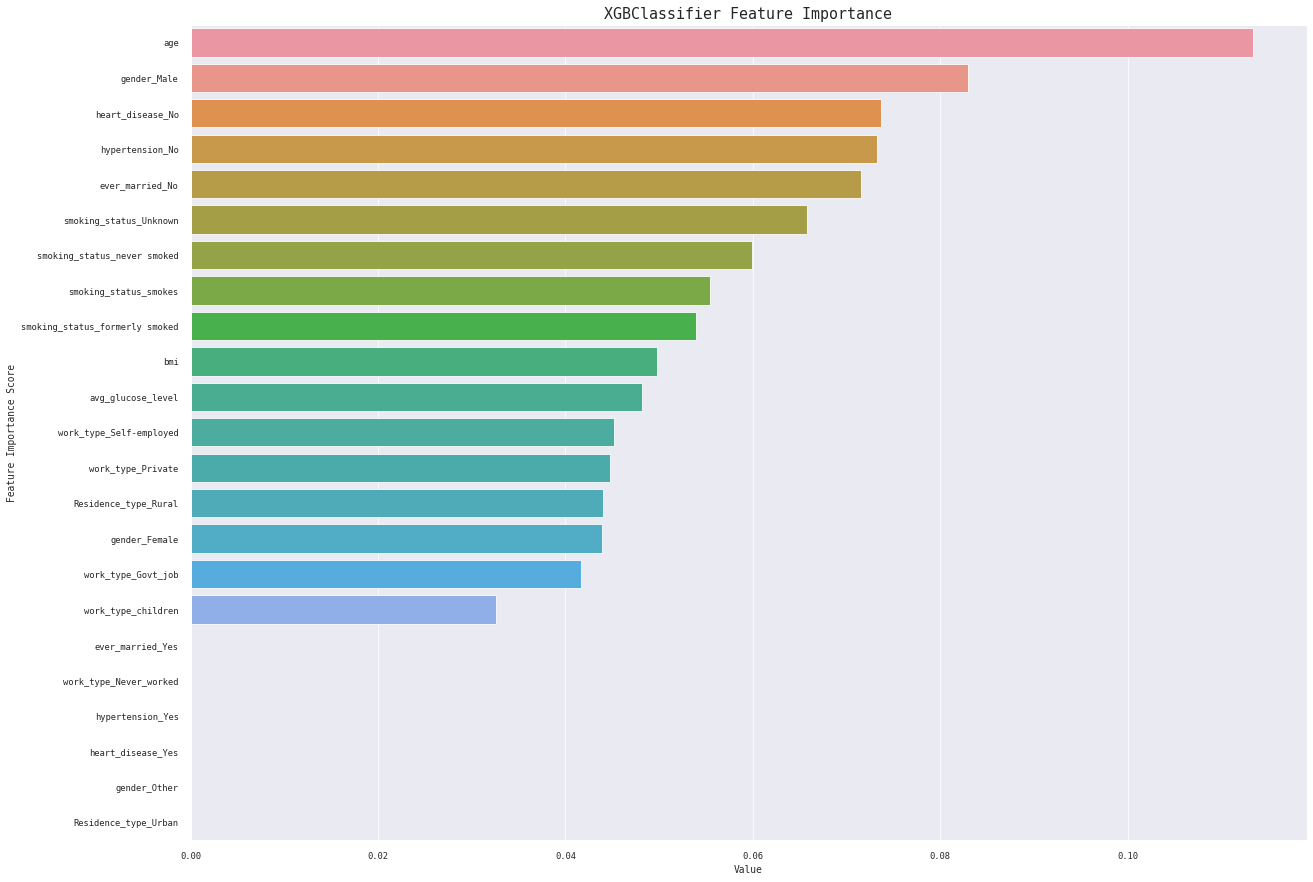

In [44]:
importance_plot(xgb_1, X)

Confusion matrix heatmap

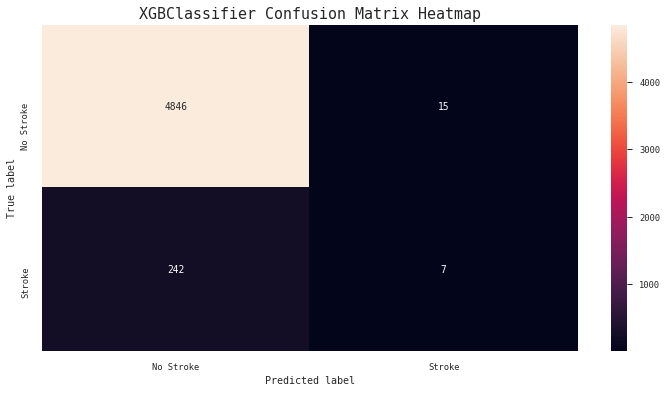

In [45]:
heat_map(xgb_1, matrix, ['No Stroke', 'Stroke'])

In [46]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4861
           1       0.32      0.03      0.05       249

    accuracy                           0.95      5110
   macro avg       0.64      0.51      0.51      5110
weighted avg       0.92      0.95      0.93      5110



ROC Curve

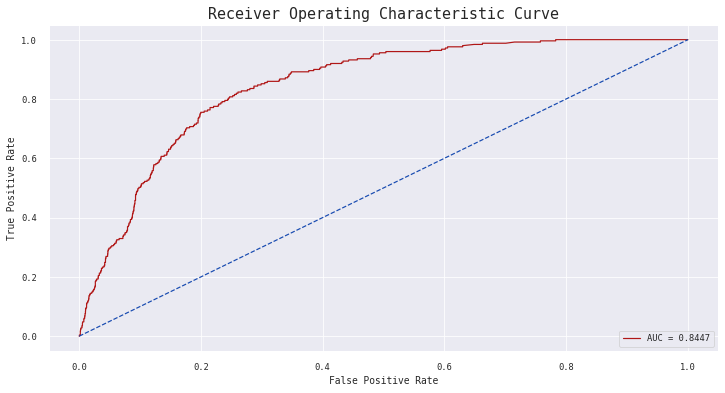

In [47]:
# Roc Curve
fpr, tpr, _ = curve_
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = '#b01717', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve', size=15); 